#*Observations:

1. When reviewing the scatter plot diagram the user can see that the bulk of the BBC and New York times data tended to be negative while CNN tends to lean to the positive.  This may be due to the fact that NYC and the UK tend to have alot of negative things occurring so the reporting and peoples responses to the stories may be more negative. 
2. The bar chart used the average sentiment value by news outlet.  This identifies CNN as have an average sentiment score that is positive.  This indicates that people positively review the stories and CNN. 
3. Depending on the dates used for the anaylsis occurs the sample set can change which will have a direct impact on the information shown on both the scatter plot and the bar charts.  This is due to the fact that the news on one day can be very positive (i.e.: Christmas) while another day is very negative (i.e.: supreme court nominations).  Depending on the polarity of the subject matter and the geographic location of the news there will be a wide swing in the results.   

In [1]:
# Dependencies
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
from pandas import DataFrame
from pandas import Series
import tweepy

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User Accounts
target_user = ("@BBCBreaking", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")
lang = "en"

# Variable for holding the oldest tweet
oldest_tweet = None

# List for dictionaries of results
sentiments = []

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    counter = 1
    
    # Loop through 1 time for each vendor
    for x in range(1):             
        # Run search around each tweet
        public_tweets = api.search(user, 
                                   count=100, 
                                   result_type="recent", 
                                   max_id=oldest_tweet,
                                   lang="en" )

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:
            # Run Vader Analysis on each tweet selected.
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

           # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
        
            # Add sentiments for each tweet into a list
            sentiments.append({"User": user,
                           "Tweet Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
            # Add to counter 
            counter += 1

In [3]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Negative,Neutral,Positive,Tweet Date,Tweets Ago,User
0,-0.4767,0.659,0.341,0.000,Mon Sep 17 22:45:03 +0000 2018,1,@BBCBreaking
1,-0.5267,0.745,0.188,0.067,Mon Sep 17 22:45:02 +0000 2018,2,@BBCBreaking
2,-0.5267,0.745,0.188,0.067,Mon Sep 17 22:45:00 +0000 2018,3,@BBCBreaking
3,0.2732,0.718,0.113,0.169,Mon Sep 17 22:44:59 +0000 2018,4,@BBCBreaking
4,-0.5267,0.745,0.188,0.067,Mon Sep 17 22:44:57 +0000 2018,5,@BBCBreaking


In [4]:
sentiments_pd.sort_values(by=['User','Tweet Date'])

,Compound,Negative,Neutral,Positive,Tweet Date,Tweets Ago,User
99,-0.0516,0.720,0.144,0.136,Mon Sep 17 22:28:44 +0000 2018,100,@BBCBreaking
98,0.0000,1.000,0.000,0.000,Mon Sep 17 22:29:07 +0000 2018,99,@BBCBreaking
97,-0.1573,0.491,0.280,0.229,Mon Sep 17 22:29:25 +0000 2018,98,@BBCBreaking
96,0.0000,1.000,0.000,0.000,Mon Sep 17 22:29:36 +0000 2018,97,@BBCBreaking
95,-0.6597,0.748,0.252,0.000,Mon Sep 17 22:29:56 +0000 2018,96,@BBCBreaking
94,0.3265,0.533,0.174,0.293,Mon Sep 17 22:30:00 +0000 2018,95,@BBCBreaking
93,-0.6597,0.769,0.231,0.000,Mon Sep 17 22:30:11 +0000 2018,94,@BBCBreaking
92,0.0000,1.000,0.000,0.000,Mon Sep 17 22:30:14 +0000 2018,93,@BBCBreaking
91,-0.7506,0.522,0.478,0.000,Mon Sep 17 22:30:36 +0000 2018,92,@BBCBreaking
90,-0.5574,0.847,0.153,0.000,Mon Sep 17 22:30:52 +0000 2018,91,@BBCBreaking


In [5]:
# Obtain the x and y coordinates for each of the News Groups
BBC_df = sentiments_pd[sentiments_pd["User"] == "@BBCBreaking"]
BBC_df

CBS_df = sentiments_pd[sentiments_pd["User"] == "@CBSNews"]
CBS_df

CNN_df = sentiments_pd[sentiments_pd["User"] == "@CNN"]
CNN_df

FOX_df = sentiments_pd[sentiments_pd["User"] == "@FoxNews"]
FOX_df

NYT_df = sentiments_pd[sentiments_pd["User"] == "@nytimes"]
NYT_df
NYT_df.head()

,Compound,Negative,Neutral,Positive,Tweet Date,Tweets Ago,User
400,-0.3400,0.686,0.196,0.118,Mon Sep 17 22:19:02 +0000 2018,1,@nytimes
401,0.3400,0.629,0.143,0.227,Mon Sep 17 22:18:58 +0000 2018,2,@nytimes
402,0.0000,1.000,0.000,0.000,Mon Sep 17 22:18:56 +0000 2018,3,@nytimes
403,-0.2732,0.861,0.139,0.000,Mon Sep 17 22:18:55 +0000 2018,4,@nytimes
404,-0.3400,0.610,0.244,0.146,Mon Sep 17 22:18:55 +0000 2018,5,@nytimes


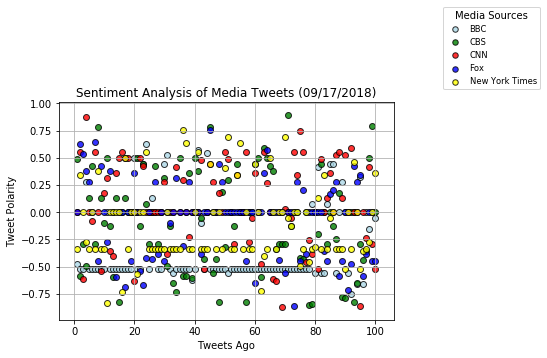

In [46]:
# Create x & y values for each of the media outlets
BBC_x_vals = BBC_df["Tweets Ago"]
BBC_y_vals = BBC_df["Compound"]

CBS_x_vals = CBS_df["Tweets Ago"]
CBS_y_vals = CBS_df["Compound"]

CNN_x_vals = CNN_df["Tweets Ago"]
CNN_y_vals = CNN_df["Compound"]

FOX_x_vals = FOX_df["Tweets Ago"]
FOX_y_vals = FOX_df["Compound"]

NYT_x_vals = NYT_df["Tweets Ago"]
NYT_y_vals = NYT_df["Compound"]

# Build the scatter plots for each city types
plt.scatter(BBC_x_vals, 
            BBC_y_vals, 
            c="lightblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="BBC")

plt.scatter(CBS_x_vals, 
            CBS_y_vals, 
            c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CBS")

plt.scatter(CNN_x_vals, 
            CNN_y_vals, 
            c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CNN")

plt.scatter(FOX_x_vals, 
            FOX_y_vals, 
            c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Fox")

plt.scatter(NYT_x_vals, 
            NYT_y_vals, 
            c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="New York Times")

# Get the current date for display
now = datetime.now()
now = now.strftime("%m/%d/%Y")

# Incorporate the other graph properties

plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim=np.arange(-1.0, 1.0, 1)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc='center right', bbox_to_anchor=(1.45, 1.25),
                  title="Media Sources", 
                  labelspacing=0.5)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]

# Save Figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

In [25]:
# Create a group based on the values in the 'maker' column
news_group = sentiments_pd.groupby('User')

# Count how many times each maker appears in our group
avg_news_group = news_group['Compound'].mean()

avg_news_group

User
@BBCBreaking   -0.339466
@CBSNews       -0.074260
@CNN            0.066635
@FoxNews       -0.057684
@nytimes       -0.108545
Name: Compound, dtype: float64

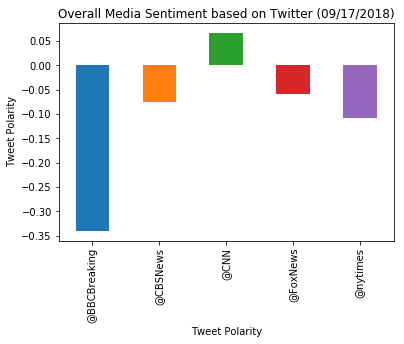

<Figure size 432x288 with 0 Axes>

In [48]:
# Create a bar chart based off of the group series from before
Media_chart = avg_news_group.plot(kind='bar')

x_axis = np.arange(len(avg_news_group))

# Set the xlabel and ylabel using class methods
Media_chart.set_xlabel("Tweet Polarity")
Media_chart.set_ylabel("Media Outlet")

plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.xlim=np.arange(-1.0, 1.0, 1)
plt.ylabel("Tweet Polarity")

plt.show()
plt.tight_layout()

# Save Figure
plt.savefig("Fig2.png")

In [50]:
# Save Figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

<Figure size 432x288 with 0 Axes>

In [51]:
# Export data to a new CSV file
sentiments_pd.to_csv("Twitter_Data.csv", index=False)